# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [16]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

def print_stats(data, gender, col):
    mean = data.loc[data['Gender'] == gender][col].mean()
    sd = data.loc[data['Gender'] == gender][col].std()
    print(gender, col, "mean:", mean)
    print(gender, col, 'std:', sd)


for gender in ['Male', 'Female']:
    for col in ['Height', 'Weight']:
        print_stats(data, gender, col)
    
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height std: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight std: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height std: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight std: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

Text(0, 0.5, 'Freq')

<Figure size 432x288 with 0 Axes>

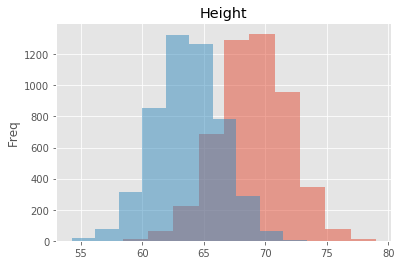

In [40]:
fig = plt.figure()
ax = male_df.hist('Height', alpha=0.5, label="Male Height")
female_df.hist('Height', ax=ax, alpha=0.5, label="Female Height")
ax[0][0].set_ylabel("Freq")  #YOU HAVE TO BE KIDDING.  Need to index numpy array for a hist.  AHHH


In [18]:
# Record your observations - are these inline with your personal observations?
# this makes sense.  Men are on average taller, but some women are taller than some men.  The means seem right.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

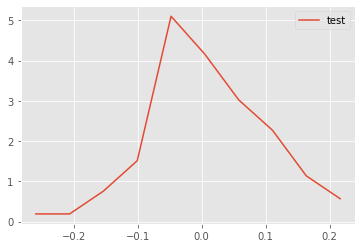

In [104]:
def density(s):
    # from last lesson>>>>
    n, bins = np.histogram(s, 10, density=1)
    # Initialize numpy arrays according to number of bins with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

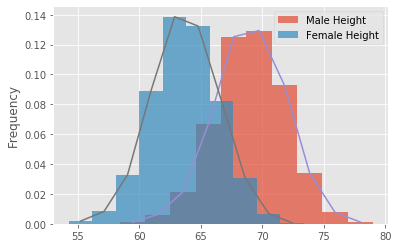

In [105]:
# FIRST TRY
# male_df.hist('Height', alpha=0.5, label="Male Height")
# female_df.hist('Height', ax=ax, alpha=0.5, label="Female Height")

# x, y = density(male_df.Height)
# plt.plot(x,y)


# Your code here 
male_df.Height.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Height");
female_df.Height.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()  # show labels

x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)


## Repeat the above exercise for male and female weights

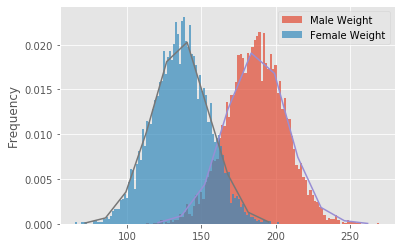

In [106]:
# Your code here 

# Your code here 
male_df.Weight.plot.hist(bins = 100, density = True,  alpha = 0.7, label ="Male Weight");
female_df.Weight.plot.hist(bins = 100, density = True, alpha = 0.7, label = 'Female Weight');
plt.legend()  # show labels

x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)


## Write your observations in the cell below

In [80]:
# Record your observations - are these inline with your personal observations?
# Yes.  It tends to correspond with height.

# What is the takeaway when comparing male and female heights and weights?
# weights and heights are closely aligned.  Males tend to be taller and weigh more.

## Repeat the above experiments in seaborn and compare with your results

Text(0, 0.5, 'Frequency')

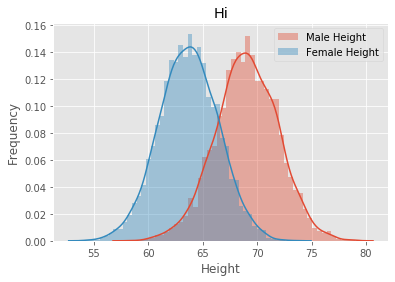

In [97]:
# Code for heights here
import seaborn as sns

sns.distplot(male_df.Height, label="Male Height")
sns.distplot(female_df.Height, label="Female Height")
plt.legend()
plt.title("Hi")
plt.ylabel("Frequency")


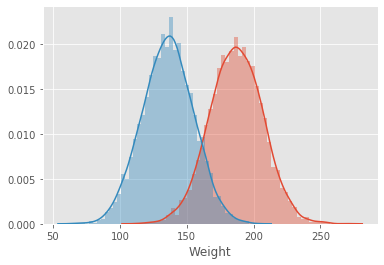

In [98]:
# Code for weights here

sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)

In [107]:
# Your comments on the two approaches here. 
# seaborn looks better and shows a smoother curve.  Density maybe has more opportunity for customization.
# I like the df plot for a quick EDA

# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.